# Project Objective:

Building a machine learning model to help governments plan investements in renewable energy to reach the 100% access to electricity goal by 2030. 

# Data

Electricity is a key pillar to human well-being and economic development. However, even today a certain percentage of the world's population does not have access to electricity.

On the other hand, a recent report by the United Nations claims that at the current rate of green house gas emissions, the temperature will rise by 2.7F leading to worsening fodd shortages. wild fires and mass death of coral reefs as soon as 2040.

To keep up with the growing needs for accessible electricity as well as to present the long term effects of global warming, energy systems must rethink their approach to renewable energy generation

The data was obtained from:
1. energy data : https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

2. population data, Access to electricity : https://data.worldbank.org/

3. Investment data: http://resourceirena.irena.org/gateway/dashboard/

Please visit Project_data_clean1.ipynb, Project_data_clean2.ipynb for original data.
Also visit population_forecasting.ipynb, investment_forecasting.ipynb, NRE_forecast.ipynb for forcasting models used in this project

In [356]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library
import matplotlib.pyplot as plt

In [357]:
India_energy = pd.read_excel("cent_elec_1993-2017.xlsx")
India_energy = India_energy.set_index('Year')

In [358]:
pop_growth = pd.read_excel("population_growth_forecast_1960-2030_India.xlsx")
pop_growth = pop_growth.set_index('Year')

In [359]:
Investment_forcast_India = pd.read_excel("Investment_per_tech_India.xlsx")

In [360]:
India_RE_gen = pd.read_excel('India_RE_profile_1990-2018.xlsx')

In [361]:
India_invest = pd.read_excel('investment_growth_forecast_2004-2030_India.xlsx')

In [362]:
NRE_India_pred = pd.read_excel('NRE_India_Forecast.xlsx')

# Predict the future needs of electricity

Here we are building a machine learning model which takes into account time and population into account which predicting the energy needs of the future for India

In [363]:
forcast_X1 = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = list(range(24,38)))

In [364]:
forcast_X1['Population'] = list(pop_growth['pop_pred'][57:])

In [365]:
# input is year,populatiion, output is cent_access
X1 = pd.DataFrame(list(range(1993,2018)), columns = ['Year'])
X1['Population'] = list(India_energy['Population'])
Y1 = India_energy['cent_access']

In [366]:
X1_train = X1[:20]
X1_test = X1[20:]
Y1_train = Y1[:20]
Y1_test = Y1[20:]

In [367]:
from sklearn.linear_model import Ridge
from sklearn import metrics

elec_pred = Ridge(alpha = 2.51)
elec_pred.fit(X1_train,Y1_train)

C:\Users\pooji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.219448e-17
  overwrite_a=True).T


Ridge(alpha=2.51, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [368]:
y1_pred = elec_pred.predict(X1_test)
print("R^2:", metrics.r2_score(y1_pred, Y1_test))

R^2: 0.6100791008028612


In [369]:
y2_pred = elec_pred.predict(forcast_X1)

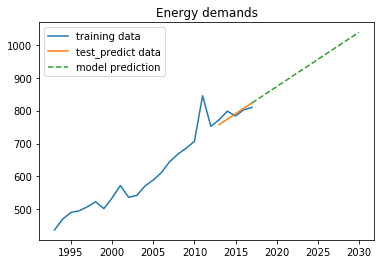

In [370]:
plt.plot(X1['Year'], Y1, label='training data')
plt.plot(X1_test['Year'], y1_pred, label='test_predict data')
plt.plot(forcast_X1['Year'], y2_pred, '--', label='model prediction')
plt.legend()
plt.title('Energy demands')
plt.show()

# Predict the growth rate of Renewable energy

In [372]:
# input is total_investment,investment_per_tech,population,year -> output is growth in RE generation
Xt = pd.DataFrame(list(range(2004,2018)), columns = ['Year'])
Xt['T_invest'] = list(India_invest['T_invest_pred'][:14])
Xt['Population'] = list(India_energy['Population'])[11:]
Yt = list(India_RE_gen['RE Generation total TWh'])[14:-1]

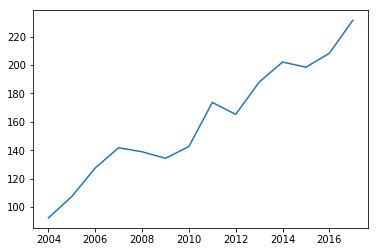

In [373]:
plt.plot(Xt['Year'], Yt)
plt.show()

In [374]:
Xt_train = Xt[:10]
Xt_test = Xt[10:]
Yt_train = Yt[:10]
Yt_test = Yt[10:]

In [375]:
forcast_Xt = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = list(range(24,38)))
forcast_Xt['T_invest'] = list(India_invest['T_invest_pred'])[13:]
forcast_Xt['Population'] = list(pop_growth['pop_pred'][57:])

In [376]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# lasso 0.001 --> 0.59
RE_growth = LinearRegression()
RE_growth.fit(Xt_train,Yt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [377]:
yt1_pred = RE_growth.predict(Xt_test)
print("R^2:", metrics.r2_score(yt1_pred, Yt_test))

R^2: 0.18604012398834802


In [378]:
yt2_pred = RE_growth.predict(forcast_Xt)

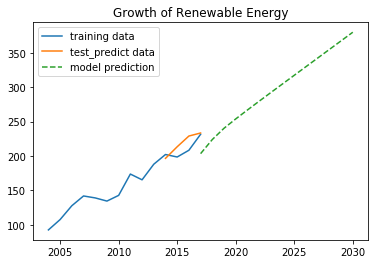

In [379]:
plt.plot(Xt['Year'], Yt, label='training data')
plt.plot(Xt_test['Year'], yt1_pred, label='test_predict data')
plt.plot(forcast_Xt['Year'], yt2_pred, '--', label='model prediction')
plt.legend()
plt.title('Growth of Renewable Energy')
plt.show()

### Growth rate of solar energy:

In [380]:
# input is total_investment,investment_per_tech,population,year -> output is growth in RE generation
X2 = pd.DataFrame(list(range(2004,2018)), columns = ['Year'])
X2['T_invest'] = list(India_invest['T_invest_pred'])[:14]
X2['Solar_invest'] = list(India_invest['solar_invest_pred'])[:14]
X2['Population'] = list(India_energy['Population'])[11:]
Y2 = np.log(list(India_RE_gen['Solar Generation TWh'])[14:-1])

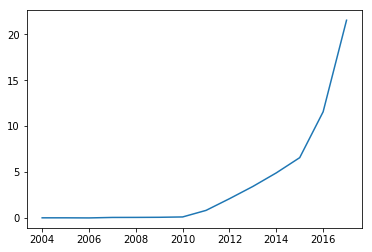

In [381]:
k = list(India_RE_gen['Solar Generation TWh'])[14:-1]
plt.plot(X2['Year'], k)

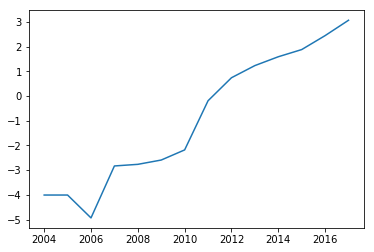

In [382]:
plt.plot(X2['Year'], Y2)

In [383]:
X2_train = X2[:10]
X2_test = X2[10:]
Y2_train = Y2[:10]
Y2_test = Y2[10:]

In [384]:
forcast_X2 = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = list(range(24,38)))
forcast_X2['T_invest'] = list(India_invest['T_invest_pred'])[13:]
forcast_X2['Solar_invest'] = list(India_invest['solar_invest_pred'])[13:]
forcast_X2['Population'] = list(pop_growth['pop_pred'][57:])

In [385]:
from sklearn.linear_model import Lasso
from sklearn import metrics

elec_pred1 = Lasso(alpha = 1000)
elec_pred1.fit(X2_train,Y2_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [386]:
y3_pred = elec_pred1.predict(X2_test)
print("R^2:", metrics.r2_score(y3_pred, Y2_test))

R^2: 0.29068834079838735


In [387]:
y4_pred = elec_pred1.predict(forcast_X2)

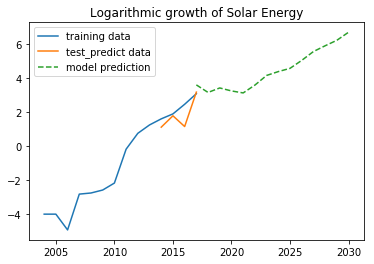

In [388]:
plt.plot(X2['Year'], Y2, label='training data')
plt.plot(X2_test['Year'], y3_pred, label='test_predict data')
plt.plot(forcast_X2['Year'], y4_pred, '--', label='model prediction')
plt.legend()
plt.title('Logarithmic growth of Solar Energy')
plt.show()

# Reaching the goal:

In [389]:
cent_access = list(India_energy['cent_access'][11:])
for i in range(1,len(y2_pred)):
    cent_access.append(y2_pred[i])

In [390]:
x1 = cent_access

In [391]:
nre_energy = list(NRE_India_pred['NRE_pred'][11:])

In [392]:
x2 = nre_energy

In [393]:
RE_pred_f = list(India_RE_gen['RE Generation total TWh'])[14:]
for i in range(2,len(yt2_pred)):
    RE_pred_f.append(yt2_pred[i])

In [394]:
x3 = RE_pred_f

In [395]:
total = []

for i in range(len(RE_pred_f)):
    x3_mtoe = 85984.5*x3[i]/1000000
    total.append(x3_mtoe + x2[i])

In [396]:
y = list(range(2004,2031))

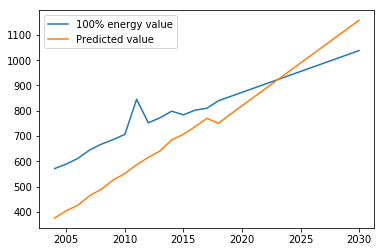

In [397]:
plt.plot(y, x1, label='100% energy value')
plt.plot(y,total , label='Predicted value')
plt.legend()
plt.show()

This concludes that India will reach 100% access to electricity by 2025 if the investment in renewable energy will follow the trend used in this model